# Homework 3 Fisherface

## Hello Soft Clustering (GMM)

In [626]:
import numpy as np
import pandas as pd
from scipy.stats import norm, multivariate_normal

### T1

In [627]:
x = np.array([[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]])
mean = np.array([[3, 3], [2, 2], [-3, -3]])
m = np.array([1/3, 1/3, 1/3])
s2 = np.array([[1, 1], [1, 1], [1, 1]])

#### E step

In [628]:
def e_step(x, mean, m, s2):
  no_class = len(m)
  w = np.zeros((no_class, x.shape[0]))
  for i in range(no_class):
    px_mean_s2 = multivariate_normal(mean[i], s2[i]).pdf(x)
    w[i, :] = px_mean_s2 * m[i]
  sum = w.sum(axis=0)
  for i in range(no_class):
    w[i, :] = w[i, :]/sum
  return w

In [629]:
w = e_step(x, mean, m, s2)
w

array([[1.19202922e-01, 7.31058579e-01, 2.68941421e-01, 9.99983299e-01,
        9.99088949e-01, 9.99876605e-01, 2.31952283e-16, 2.31952283e-16,
        3.30570063e-37],
       [8.80797076e-01, 2.68941421e-01, 7.31058579e-01, 1.67014218e-05,
        9.11051194e-04, 1.23394576e-04, 1.38879439e-11, 1.38879439e-11,
        5.90009054e-29],
       [1.81545808e-09, 1.69570706e-16, 1.01529005e-11, 2.03105874e-42,
        5.37528453e-32, 3.30529272e-37, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00]])

#### M step

In [630]:
def m_step(x, w):
  N = x.shape[0]
  dim = x.shape[1]
  no_class = w.shape[0]
  new_m = (1/N)*(w.sum(axis=1))
  new_mean = np.zeros((no_class, dim))
  for i in range(no_class):
    sum_wx = (x * w[i, :].reshape(N, 1)).sum(axis=0)
    new_mean[i, :] = sum_wx/(w.sum(axis=1)[i])

  new_s2 = np.zeros((no_class, dim))
  for i in range(no_class):
    ac = np.zeros(dim)
    for n in range(N):
      xn_diff_mean = (x[n] - new_mean[i]).reshape(dim, 1)
      cov_diag = np.matmul(xn_diff_mean,xn_diff_mean.T).diagonal()
      ac += w[i,n] * cov_diag
    ac /= w.sum(axis=1)[i]
    new_s2[i] = ac
  
  return new_m, new_mean, new_s2


In [631]:
newm, newmean , news2 = m_step(x, w)
print('newm', newm)
print('newmean', newmean)
print('news2', news2)

newm [0.45757242 0.20909425 0.33333333]
newmean [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
news2 [[4.53619412 4.28700611]
 [0.51645579 0.13152618]
 [4.66666668 2.88888891]]


In [632]:
def gmm(x, m, mean, s2, iter):
  N = x.shape[0]
  dim = x.shape[1]
  no_class = m.shape[0]
  temp_w = np.zeros((dim, N))
  temp_m = m
  temp_mean = mean
  temp_s2 = s2
  mle = np.zeros(iter)
  for i in range(iter):
    print('iteration', i+1)
    temp_w = e_step(x, temp_mean, temp_m, temp_s2)
    print('w = \n', pd.DataFrame(temp_w, index= ['j=' + str(i) for i in range(no_class)]), '\n')
    temp_m, temp_mean , temp_s2 = m_step(x, temp_w)
    print('m =', pd.DataFrame(temp_m, index= ['j=' + str(i) for i in range(no_class)]), '\n')
    print('center =', pd.DataFrame(temp_mean, index= ['j=' + str(i) for i in range(no_class)]), '\n')
    print('sigma2 =', pd.DataFrame(temp_s2, index= ['j=' + str(i) for i in range(no_class)]), '\n')
    p_each_class = (temp_w*temp_m.reshape(no_class, 1)).sum(axis=1)
    mle[i] = (np.log(p_each_class)).sum()
    print('mle =', mle[i])
    print('-----------------------------------------------------------------------------------------------')
  return mle

In [633]:
mle = gmm(x,m,mean,s2,3)

iteration 1
w = 
                 0             1  ...             7             8
j=0  1.192029e-01  7.310586e-01  ...  2.319523e-16  3.305701e-37
j=1  8.807971e-01  2.689414e-01  ...  1.388794e-11  5.900091e-29
j=2  1.815458e-09  1.695707e-16  ...  1.000000e+00  1.000000e+00

[3 rows x 9 columns] 

m =             0
j=0  0.457572
j=1  0.209094
j=2  0.333333 

center =             0         1
j=0  5.789927  5.818873
j=1  1.677182  2.145231
j=2 -4.000000 -4.666667 

sigma2 =             0         1
j=0  4.536194  4.287006
j=1  0.516456  0.131526
j=2  4.666667  2.888889 

mle = -0.2991314416969362
-----------------------------------------------------------------------------------------------
iteration 2
w = 
             0             1  ...             7              8
j=0  0.003169  6.551012e-01  ...  3.085027e-08   5.395094e-16
j=1  0.996825  3.448981e-01  ...  1.358747e-67  1.087586e-168
j=2  0.000006  6.842507e-07  ...  1.000000e+00   1.000000e+00

[3 rows x 9 columns] 

m =       

###T2

In [634]:
for i in range(len(mle)):
  print('iteration', i, 'value =', mle[i])

iteration 0 value = -0.2991314416969362
iteration 1 value = -0.1004737894738374
iteration 2 value = -0.013535906067107124


In [635]:
print('Yes it went up every iteration')

Yes it went up every iteration


### T3

In [636]:
x_2 = np.array([[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]])
mean_2 = np.array([[3, 3], [-3, -3]])
m_2 = np.array([1/2, 1/2])
s2_2 = np.array([[1, 1], [1, 1]])

In [637]:
w_2 = e_step(x_2, mean_2, m_2, s2_2)
w_2.shape

(2, 9)

In [638]:
newm_2, newmean_2 , news2_2 = m_step(x_2, w_2)

In [639]:
mle_2 = gmm(x_2,m_2,mean_2,s2_2,3)

iteration 1
w = 
                 0             1  ...             7             8
j=0  1.000000e+00  1.000000e+00  ...  2.319523e-16  3.305701e-37
j=1  1.522998e-08  2.319523e-16  ...  1.000000e+00  1.000000e+00

[2 rows x 9 columns] 

m =             0
j=0  0.666667
j=1  0.333333 

center =        0         1
j=0  4.5  4.666667
j=1 -4.0 -4.666667 

sigma2 =             0         1
j=0  6.916667  5.888889
j=1  4.666667  2.888889 

mle = 1.386294366209134
-----------------------------------------------------------------------------------------------
iteration 2
w = 
             0             1         2  ...         6         7             8
j=0  0.999879  9.999997e-01  0.999976  ...  0.000241  0.000153  5.224293e-09
j=1  0.000121  2.594034e-07  0.000024  ...  0.999759  0.999847  1.000000e+00

[2 rows x 9 columns] 

m =             0
j=0  0.666694
j=1  0.333306 

center =             0         1
j=0  4.499613  4.666202
j=1 -3.999932 -4.666512 

sigma2 =             0         1
j=0  6.

### T4

In [640]:
for i in range(len(mle_2)):
  print('iteration', i, 'value =', mle_2[i])

iteration 0 value = 1.386294366209134
iteration 1 value = 1.3862112661723693
iteration 2 value = 1.3862107745317829


In [641]:
print('Yes it went up every iteration but with very slow speed so I think 3 mixtures should be better')

Yes it went up every iteration but with very slow speed so I think 3 mixtures should be better



## The face database

In [642]:
!wget 'https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW03/facedata_mat.zip'

--2022-02-23 13:40:32--  https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW03/facedata_mat.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 953320 (931K) [application/zip]
Saving to: ‘facedata_mat.zip.3’

facedata_mat.zip.3  100%[===================>] 930.98K  --.-KB/s    in 0.02s   

2022-02-23 13:40:32 (39.6 MB/s) - ‘facedata_mat.zip.3’ saved [953320/953320]



In [643]:
!unzip 'facedata_mat.zip'

Archive:  facedata_mat.zip
  inflating: facedata.mat            


In [644]:
import scipy.io
data = scipy.io.loadmat('facedata')

In [645]:
arr = data['facedata']
arr.shape

(40, 10)

In [646]:
arr[0][0].shape

(56, 46)

In [647]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

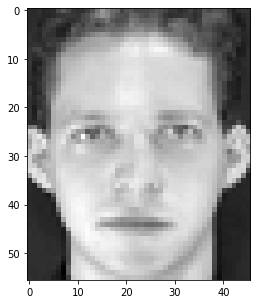

In [648]:
plt.imshow(arr[0,0],cmap="gray")
plt.show()

In [649]:
from skimage import img_as_float

In [650]:
arr[0,0]

array([[48, 46, 50, ..., 50, 54, 53],
       [47, 47, 48, ..., 37, 46, 50],
       [46, 48, 43, ..., 33, 41, 51],
       ...,
       [49, 49, 50, ..., 45, 46, 47],
       [48, 48, 49, ..., 45, 46, 46],
       [51, 48, 50, ..., 45, 45, 46]], dtype=uint8)

In [651]:
xf = np.copy(arr)
xf[0,0] = img_as_float(arr[0,0]).reshape(56*46)
print(xf[0,0])

[0.18823529 0.18039216 0.19607843 ... 0.17647059 0.17647059 0.18039216]


In [652]:
for i in range(arr.shape[0]):
  for j in range(arr.shape[1]):
    xf[i, j] = img_as_float(arr[i, j]).reshape(56*46)

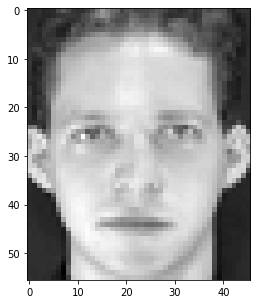

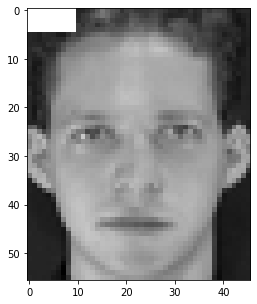

In [653]:
plt.imshow(xf[0,0].reshape(56, 46),cmap="gray")
plt.show()
x_temp = np.copy(xf[0,0]).reshape(56, 46)
x_temp[0:5,0:10] = 1
# In float format, 1 is white
plt.imshow(x_temp, cmap="gray")
plt.show()

In [654]:
def show_image(data, height=56, width=46):
  plt.imshow(data.reshape(height, width),cmap="gray")
  plt.show()
  return

### The similarity matrix

In [655]:
def euclidean_distance(x, y):
  return (((x - y)**2).sum())**(0.5)

#### T5

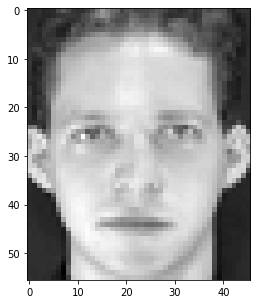

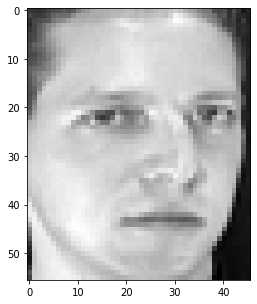

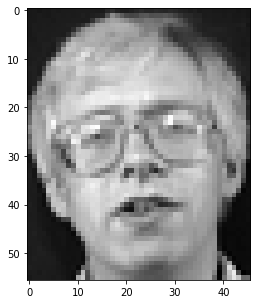

In [656]:
show_image(xf[0, 0])
show_image(xf[0, 1])
show_image(xf[1, 0])

In [657]:
xf[0, 1].shape

(2576,)

In [658]:
euclidean_distance(xf[0,0], xf[0,1]), euclidean_distance(xf[0,0], xf[1,0])

(10.037616294165492, 8.173295099737281)

**Maybe make sense, because the black color point of (0,0) and (1, 0) having more overlap,
also the face since we just comparing color of each point.
I think this number maybe useful if we implement more classify parameter
but if using this number alone, it may still not a good choice for face verification**

#### T6

In [659]:
X[0,0].shape

()

In [660]:
X = np.zeros((56*46, 25))
i = 0
for f in xf[:5, :5].reshape(25):
  X[:, i] = f
  i += 1
X

array([[0.18823529, 0.24705882, 0.17254902, ..., 0.50980392, 0.51372549,
        0.49411765],
       [0.18039216, 0.23529412, 0.2       , ..., 0.50980392, 0.51764706,
        0.49411765],
       [0.19607843, 0.22352941, 0.21568627, ..., 0.50588235, 0.52156863,
        0.49411765],
       ...,
       [0.17647059, 0.1254902 , 0.11764706, ..., 0.19607843, 0.20392157,
        0.33333333],
       [0.17647059, 0.1372549 , 0.11764706, ..., 0.2       , 0.21176471,
        0.33333333],
       [0.18039216, 0.12941176, 0.10980392, ..., 0.2       , 0.21568627,
        0.33333333]])

In [661]:
def similarity_matrix(T, D):
  A = np.zeros((T.shape[1], D.shape[1]))
  for i in range(T.shape[1]):
    for j in range(D.shape[1]):
      A[i, j] = euclidean_distance(T[:,i], D[:, j])
  return A

In [662]:
example = similarity_matrix(X, X)

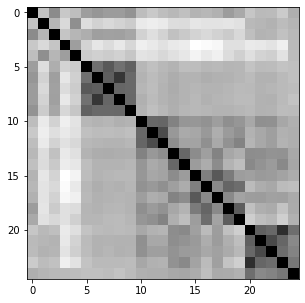

In [663]:
show_image(example, 25, 25)

### T and D

In [664]:
T = np.zeros((56*46, 120))
T_temp = xf[:, :3].reshape(120)
for i in range(120):
  T[:, i] = T_temp[i].reshape(56*46)

D = np.zeros((56*46, 280))
D_temp = xf[:, 3:].reshape(280)
for i in range(280):
  D[:, i] = D_temp[i].reshape(56*46)

#### T7

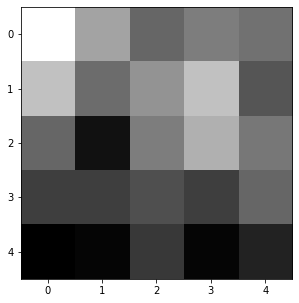

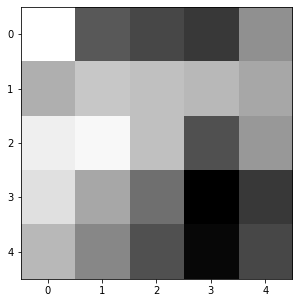

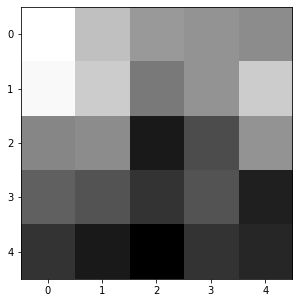

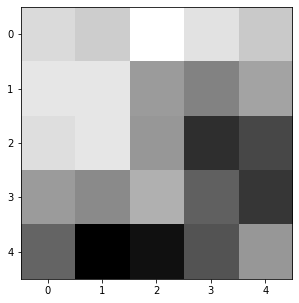

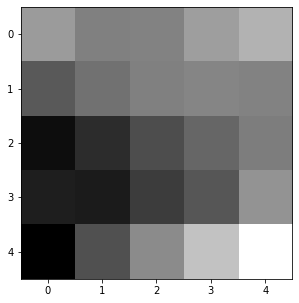

In [665]:
for image in xf[2,:5]:
  show_image(image.reshape(56, 46)[5:10, 5:10], 5, 5)

**Five picture of person number 2 are taken in different angle of face.**

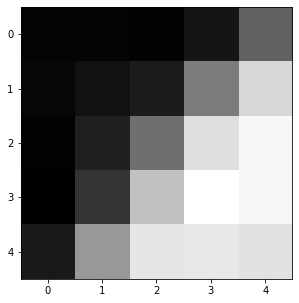

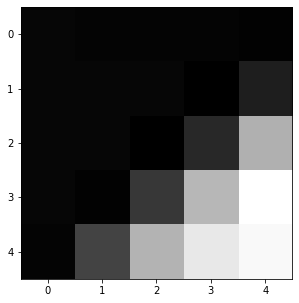

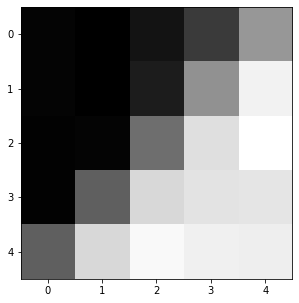

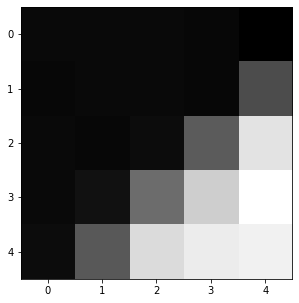

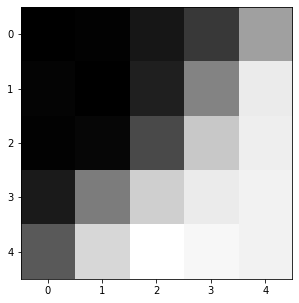

In [666]:
for image in xf[1,:5]:
  show_image(image.reshape(56, 46)[5:10, 5:10], 5, 5)

**Five pictures of person number 1 are taken in quite same angle of face.**

### A simple face verification system

#### T8

In [667]:
A = similarity_matrix(T, D)

In [668]:
import math

### evaluate

In [669]:
def evaluate(A, treshold):
  round = math.gcd(A.shape[0], A.shape[1])
  train_size = int(A.shape[0]/round)
  test_size = int(A.shape[1]/round)
  predict = np.zeros((round, A.shape[1]))
  for i in range(round):
    for j in range(round):
      min_sc = A[train_size * i: train_size*(i+1),test_size*j:test_size*(j+1)].min(axis=0)
      predict[i, test_size*j: test_size*(j+1)] = (min_sc < treshold)*1
  predict.shape
  true_pos = 0
  true_neg = 0
  false_pos = 0
  false_neg = 0
  for i in range(round):
    true_pos_i = (predict[i, test_size*i: test_size*(i+1)] == 1).sum()
    true_pos += true_pos_i
    true_neg_i = predict[i].sum() - true_pos_i 
    true_neg += true_neg_i
    false_pos += (round - 1) * test_size - true_neg_i
    false_neg += test_size - true_pos_i
  # print(true_pos)
  # print(true_neg)
  # print(false_pos)
  # print(false_neg)
  tp_rate = true_pos/(true_pos + false_neg)
  fa_rate = true_neg/(false_pos + true_neg)
  return tp_rate, fa_rate

In [670]:
tp_rate, fa_rate = evaluate(A, 10)
print('true positive rate is', tp_rate)
print('false alarm rate is', fa_rate)

true positive rate is 0.9964285714285714
false alarm rate is 0.4564102564102564


#### T9

In [671]:
def find_threshold(A):
  tp_rate = 1
  fa_rate = 1
  min_t = 10
  while tp_rate != 0 or fa_rate != 0:
    min_t -= 1
    tp_rate, fa_rate = evaluate(A, min_t)

  max_t = 0
  while tp_rate != 1 or fa_rate != 1:
    max_t += 1
    tp_rate, fa_rate = evaluate(A, max_t)
  return min_t, max_t

In [672]:
min_t, max_t = find_threshold(A)
print(min_t, max_t)

1 17


In [673]:
def roc(A, min_t, max_t):
  t = np.arange(min_t, max_t, (max_t - min_t)/1000)
  tp_rate_list = np.zeros(1000)
  fa_rate_list = np.zeros(1000)
  for i in range(1000):
    tp_rate_list[i], fa_rate_list[i] = evaluate(A, t[i])
  return tp_rate_list, fa_rate_list

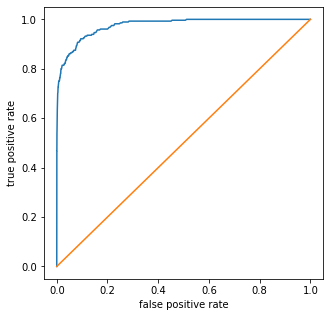

In [674]:
tp_rate_list, fa_rate_list = roc(A, min_t , max_t)
plt.plot(fa_rate_list, tp_rate_list)
plt.plot([0,1], [0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.show()

####T10

In [675]:
def get_middle_linear(x1, y1, x2, y2):
  m = (y2-y1)/(x2-x1)
  c = y1 - (m*x1)
  x = (1-c)/(1+m)
  y = m*x + c
  return x, y

### get_eer

In [676]:
def get_eer(tp_rate_list, fa_rate_list):
  for i in range(len(tp_rate_list)):
    tp = tp_rate_list[i]
    fa = fa_rate_list[i]
    if tp + fa == 1:
      return tp/fa
    if tp + fa > 1:
      if i == 0:
        return tp/fa
      x1, y1 = tmp
      x, y = get_middle_linear(x1, y1, fa, tp)
      return y/x
    tmp = (fa, tp)

eer = get_eer(tp_rate_list, fa_rate_list)
eer

10.185086551264979

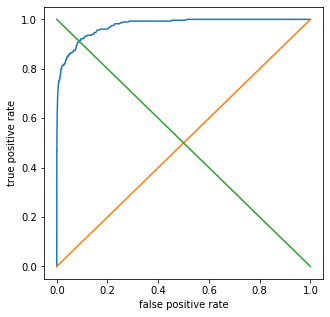

eer = 10.185086551264979


In [677]:
plt.plot(fa_rate_list, tp_rate_list)
plt.plot([0, 1], [0, 1])
plt.plot([0, 1], [1, 0])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.show()
print('eer =', eer)

In [678]:
def recall_at_fa(fa_rate_list, tp_rate_list, needed_fa):
   for i in range(len(tp_rate_list)):
    tp = tp_rate_list[i]
    fa = fa_rate_list[i]
    if fa == needed_fa:
      return tp
    if fa > needed_fa:
      if i == 0:
        return fa
      x1, y1 = tmp
      x, y = get_middle_linear(x1, y1, fa, tp)
      return y
    tmp = (fa, tp)

In [679]:
needed_fa = 0.1
print('recall at false alarm rate 0.1% is', recall_at_fa(fa_rate_list, tp_rate_list, needed_fa))

recall at false alarm rate 0.1% is 0.9214285714285714


### Principle Component Analysis (PCA)

####T11

In [680]:
mean = np.zeros(56* 46)
i = 0
for array in T_temp:
  i += 1
  mean += array
mean /= i
mean

array([0.33444444, 0.33598039, 0.33611111, ..., 0.2780719 , 0.27924837,
       0.27715686])

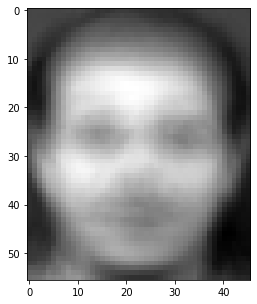

In [681]:
show_image(mean)
mean = mean.reshape(56*46)

####T12

**Size of covariance matrix is (56x46) x (56x46), the rank of matrix is 40x3 - 1 = 119**

####T13

**Size of gram matrix is 120 x 120 and the rank is still 40x3 - 1 = 119 <br/>
We expect to get 119 non-zero eigenvalues**

####T14

**Yes, because it is covariance matrix too and symmetric is property of covariance matrix**

In [682]:
X = T - mean.reshape((2576,1))
X_t = X.T

In [683]:
def expect_val(f1, f2, mean):
  return ((abs((f1 - mean)*(f2 - mean)).sum()))**(0.5)

In [684]:
T[:,0]

array([0.18823529, 0.18039216, 0.19607843, ..., 0.17647059, 0.17647059,
       0.18039216])

In [685]:
def cov_matrix(T, mean):
  cov = np.zeros((T.shape[1], T.shape[1]))
  for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
      f1 = T[:, i]
      f2 = T[:, j]
      cov[i, j] = expect_val(f1, f2, mean)
  return cov
cov = cov_matrix(T, mean)
cov

array([[ 7.50534008,  7.68444217,  7.43660536, ...,  5.70314096,
         5.96741789,  6.22283658],
       [ 7.68444217, 10.04282508,  8.67426158, ...,  7.01112254,
         6.73732301,  7.21927644],
       [ 7.43660536,  8.67426158,  8.64901611, ...,  6.54865846,
         6.40317027,  6.73407061],
       ...,
       [ 5.70314096,  7.01112254,  6.54865846, ...,  6.95785152,
         5.89722888,  6.39421128],
       [ 5.96741789,  6.73732301,  6.40317027, ...,  5.89722888,
         6.51879445,  6.36751103],
       [ 6.22283658,  7.21927644,  6.73407061, ...,  6.39421128,
         6.36751103,  7.22623809]])

####T15

In [686]:
eigenvalue, eigenvector_prime = np.linalg.eigh(np.matmul(X_t, X))

In [687]:
eigenvalue
# eigenvalue is already ascending sort

array([-4.67496566e-15,  1.09424775e+00,  1.69989241e+00,  2.09754295e+00,
        2.55027268e+00,  2.57040486e+00,  2.73615457e+00,  3.07484004e+00,
        3.13382008e+00,  3.17991974e+00,  3.33786964e+00,  3.48280728e+00,
        3.60769552e+00,  3.73729252e+00,  3.85503768e+00,  4.08710908e+00,
        4.30629265e+00,  4.36539783e+00,  4.38079609e+00,  4.42540052e+00,
        4.51980627e+00,  4.84416411e+00,  4.96557523e+00,  5.18058886e+00,
        5.28744901e+00,  5.49586571e+00,  5.54588226e+00,  5.63739658e+00,
        5.86818443e+00,  5.97416667e+00,  5.99683335e+00,  6.07957689e+00,
        6.39912804e+00,  6.48667412e+00,  6.55937510e+00,  6.71571512e+00,
        7.01566211e+00,  7.15178119e+00,  7.34221210e+00,  7.66085696e+00,
        7.87207485e+00,  7.99193453e+00,  8.22360688e+00,  8.36769339e+00,
        8.52529596e+00,  8.67215720e+00,  8.95945198e+00,  9.36396662e+00,
        9.40406390e+00,  9.56496785e+00,  9.86526053e+00,  9.99124383e+00,
        1.03355906e+01,  

In [688]:
eigenvalue = eigenvalue[-1::-1]
eigenvector_prime = eigenvector_prime[:, -1::-1]

In [689]:
eigenvalue

array([ 1.42392971e+03,  8.75375177e+02,  5.58624400e+02,  4.07347157e+02,
        3.71021274e+02,  2.63280801e+02,  2.03396990e+02,  1.90965101e+02,
        1.66548056e+02,  1.43570551e+02,  1.22951200e+02,  1.04788229e+02,
        9.36606993e+01,  8.52020934e+01,  8.00790884e+01,  7.22926270e+01,
        6.92896016e+01,  6.55557914e+01,  6.16791259e+01,  5.90743553e+01,
        5.42659430e+01,  5.19180210e+01,  4.60439029e+01,  4.49517564e+01,
        4.38154370e+01,  4.17882938e+01,  4.04839086e+01,  3.80160594e+01,
        3.72939497e+01,  3.42784031e+01,  3.38082909e+01,  3.24110643e+01,
        3.01160763e+01,  2.88090967e+01,  2.76934934e+01,  2.72362796e+01,
        2.63193795e+01,  2.55181270e+01,  2.42531018e+01,  2.33566654e+01,
        2.24888684e+01,  2.22128871e+01,  2.13271981e+01,  2.05964187e+01,
        1.97567698e+01,  1.91068901e+01,  1.86898335e+01,  1.81386227e+01,
        1.79801629e+01,  1.69617092e+01,  1.63867949e+01,  1.56952212e+01,
        1.56409226e+01,  

#### T16

**119 values**

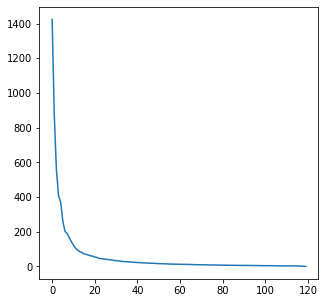

In [690]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(np.arange(120), eigenvalue)
plt.show()

In [691]:
log_ev = np.log(eigenvalue + 1e-3)
sum_log = log_ev.sum()
threshold = (95/100)*sum_log
tmp = sum_log
i = 120
while tmp > threshold:
  i -= 1
  tmp -= log_ev[i]
i

98

**The variance would be first time lower if we remove eigenvector index = 98 ~ 119 so we need to keep eigenvector index = 0 ~ 98 <br/> To remain the variance above 95%
So the answer is 99 eigenvectors should be use**

####T17

In [692]:
X.shape

(2576, 120)

In [693]:
eigenvector = np.matmul(X, eigenvector_prime)

In [694]:
for i in range(eigenvector.shape[1]):
  eigenvector[:, i] /= np.linalg.norm(eigenvector[:, i])

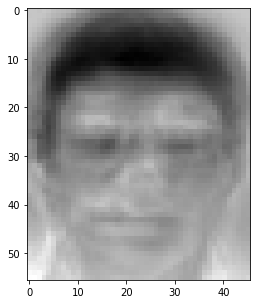

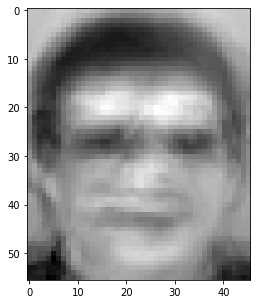

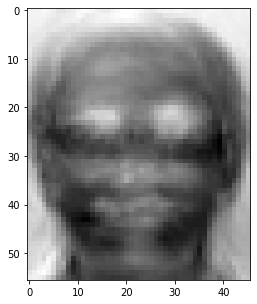

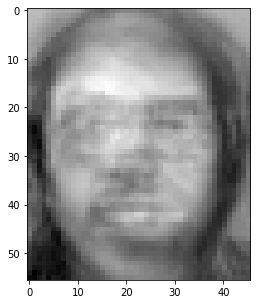

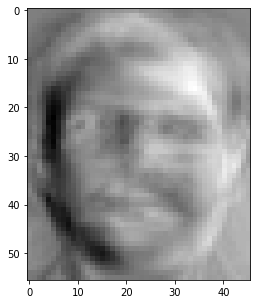

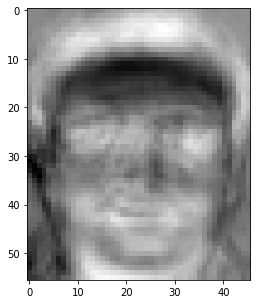

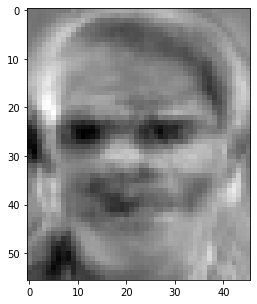

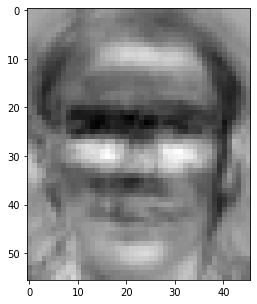

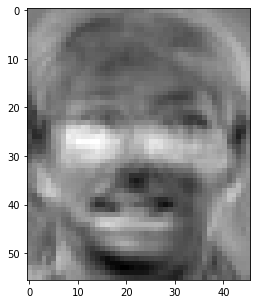

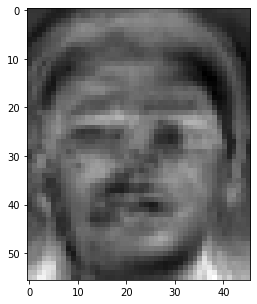

In [695]:
for i in range(10):
  show_image(1 - eigenvector[:, i].reshape(56, 46))

####T18

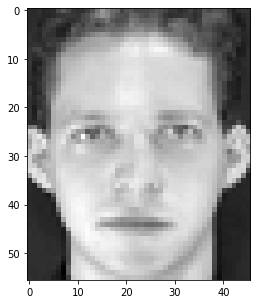

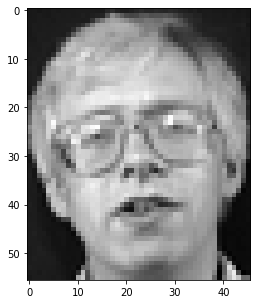

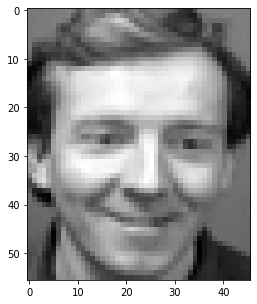

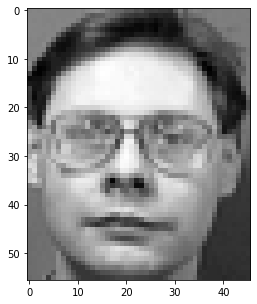

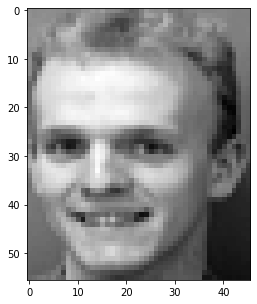

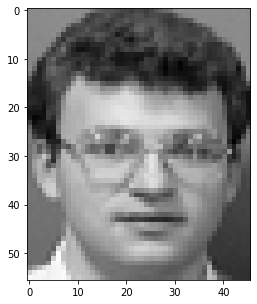

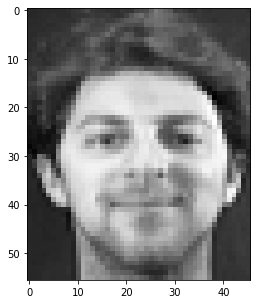

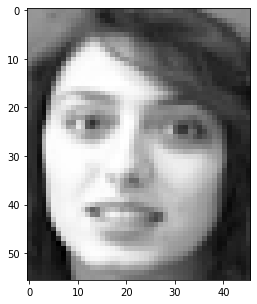

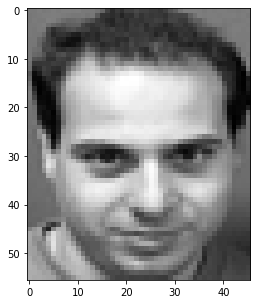

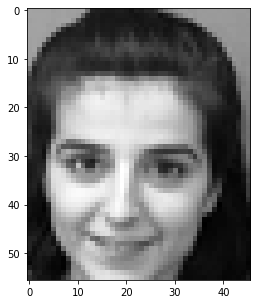

In [696]:
for i in range(10):
  show_image(T_temp[3*i])

**From the first eigenvector we could see the outstanding part is the hair but this hair are also told we about forehead too .If we look at some image we could see that all of them got similar forehead so the first eigenvector is capture about the forehead <br/>
 For the second eigenvector the outstand area are still the hair additional with black in the eye which could tell that are something about eye and if we look at original image we can see that some of them wear glasses.
So I think the second eigenvector may told about glasses.**

#### T19 Pca

In [697]:
def pca_and_sm(eigenvector, xf, k=10, ratio=0.3):
  feat = xf[0, 0].shape[0]
  person = xf.shape[0]
  im_count = xf.shape[1]
  eg_count = eigenvector.shape[1]
  all = np.zeros((feat, person * im_count))
  for i in range(person):
    for j in range(im_count):
      all[:,10*i + j] = xf[i, j].reshape(feat)
  mean = all.reshape((feat, person, im_count))[:, :, :int(im_count * ratio)].reshape((feat, int(person * im_count * ratio))).mean(axis=1).reshape((feat, 1))
  # mean = all.mean(axis=1).reshape((feat, 1))

  p = np.matmul(eigenvector.T, all - mean)
  p = p.reshape((eg_count, person, im_count))

  new_T = p[:k,:, :int(ratio * im_count)].reshape(k, int(ratio*person*im_count))
  new_D = p[:k,:, int(ratio * im_count):].reshape(k, int((1 - ratio)*person*im_count))

  sm_2 = similarity_matrix(new_T, new_D)
  return sm_2, new_T, new_D

In [698]:
sm_2, _, _ = pca_and_sm(eigenvector, xf)

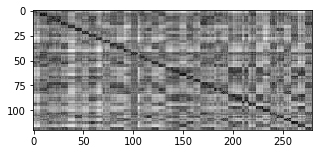

In [699]:
plt.imshow(sm_2,cmap='gray')

In [700]:
def eer_pipe(sm_matrix):
  min_t, max_t = find_threshold(sm_matrix)
  tp_rate_list, fa_rate_list = roc(sm_matrix, min_t, max_t)
  plt.plot(fa_rate_list, tp_rate_list)
  plt.plot([0, 1], [0, 1])
  plt.ylabel("true positive rate")
  plt.xlabel("false positive rate")
  plt.plot([0, 1], [1, 0])
  plt.show()
  eer_value = get_eer(tp_rate_list, fa_rate_list)
  recall_fa_need = recall_at_fa(fa_rate_list, tp_rate_list, 0.1)
  return eer_value, recall_fa_need

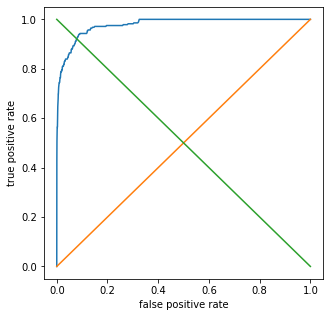

eer= 11.727272727272718
recall for fa 0.1% = 0.9428571428571428


In [701]:
eer_k10, recall_k10 = eer_pipe(sm_2)
print('eer=', eer_k10)
print('recall for fa 0.1% =', recall_k10)

#### T20

In [702]:
xf.shape

(40, 10)

5


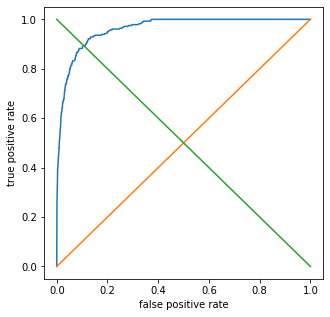

6


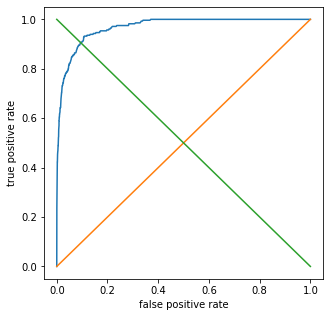

7


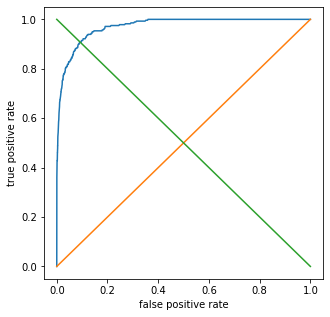

8


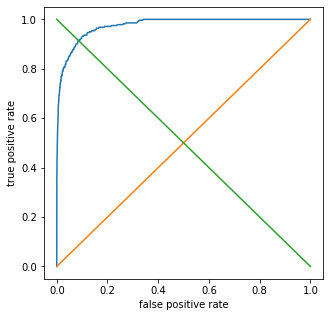

9


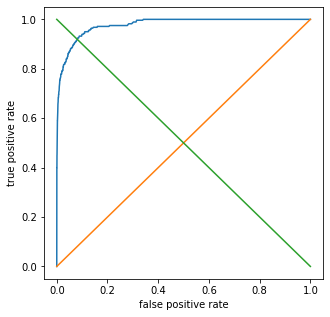

10


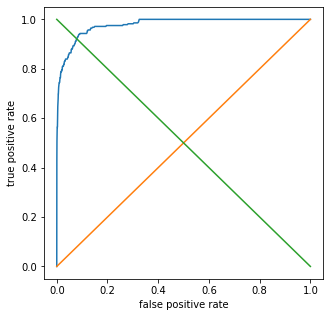

11


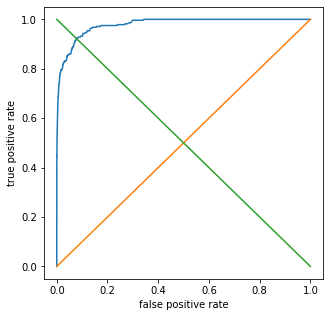

12


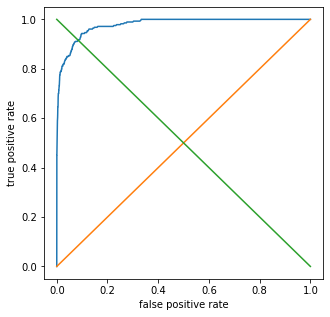

13


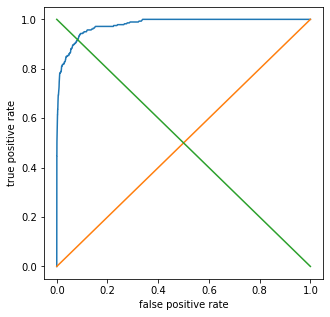

14


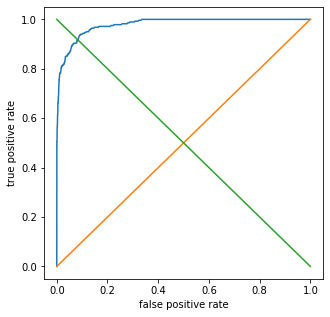

In [703]:
best_iter_list = []
best_eer = 0
best_iter = 0
for i in range(5,15):
  print(i)
  sm_tmp, _, _ = pca_and_sm(eigenvector, xf, k=i)
  eer_tmp, _ = eer_pipe(sm_tmp)
  if eer_tmp == best_eer:
    best_iter_list.append(i)
  if eer_tmp > best_eer:
    best_iter_list = [eer_tmp]
    best_eer = eer_tmp
    best_iter = i

In [704]:
best_iter_list

[11.870771899392885]

### Linear Discriminant Analysis (LDA)

#### 21

**N = 3*40, C=40 so we have to get N-C = 80 features**

In [705]:
_, T_80, D_80 = pca_and_sm(eigenvector, xf, k=80)

In [706]:
T_80 = T_80.reshape((80, 40, 3))
T_80.shape

(80, 40, 3)

In [707]:
class_mean = T_80.mean(axis=2)
class_mean.shape

(80, 40)

#### 22

In [708]:
mean_all = class_mean.mean(axis=1)
no_class = class_mean.shape[1]
no_feat = mean_all.shape[0]
Sb = np.zeros((no_feat, no_feat))
for i in range(no_class):
  mi_del_mean = (class_mean[:, i] - mean_all).reshape(no_feat, 1)
  Sb += np.matmul(mi_del_mean, mi_del_mean.T)
Sb

array([[ 4.59333238e+02, -1.54646623e+00, -3.49470193e+00, ...,
         7.07999422e-01, -1.24358888e-01,  4.00444275e-01],
       [-1.54646623e+00,  2.68819350e+02, -2.58319745e+00, ...,
         7.35237000e-01, -8.18106476e-03,  9.52924292e-01],
       [-3.49470193e+00, -2.58319745e+00,  1.63903819e+02, ...,
        -5.68866570e-01, -8.18413942e-01, -1.72163116e-01],
       ...,
       [ 7.07999422e-01,  7.35237000e-01, -5.68866570e-01, ...,
         2.98429320e-01,  1.88472237e-01,  3.26989245e-02],
       [-1.24358888e-01, -8.18106476e-03, -8.18413942e-01, ...,
         1.88472237e-01,  3.08184645e-01, -3.21356374e-02],
       [ 4.00444275e-01,  9.52924292e-01, -1.72163116e-01, ...,
         3.26989245e-02, -3.21356374e-02,  3.23155692e-01]])

In [709]:
mean_all = class_mean.mean(axis=1)
no_class = class_mean.shape[1]
Sw = np.zeros((no_feat, no_feat))
for i in range(no_class):
  no_feat = T_80.shape[0]
  all_x_del_mean = T_80[:,i,:] - class_mean[:, i].reshape((no_feat, 1))
  no_image = all_x_del_mean.shape[1]
  Swi = np.zeros((no_feat, no_feat))
  for j in range(no_image):
    xj_del_mean = all_x_del_mean[:, j].reshape((no_feat, 1))
    Swi += np.matmul(xj_del_mean, xj_del_mean.T)
  Sw += Swi
Sw

array([[ 4.59300012e+01,  4.63939869e+00,  1.04841058e+01, ...,
        -2.12399827e+00,  3.73076664e-01, -1.20133282e+00],
       [ 4.63939869e+00,  6.89171283e+01,  7.74959234e+00, ...,
        -2.20571100e+00,  2.45431943e-02, -2.85877288e+00],
       [ 1.04841058e+01,  7.74959234e+00,  6.69129448e+01, ...,
         1.70659971e+00,  2.45524183e+00,  5.16489348e-01],
       ...,
       [-2.12399827e+00, -2.20571100e+00,  1.70659971e+00, ...,
         7.32831892e+00, -5.65416710e-01, -9.80967735e-02],
       [ 3.73076664e-01,  2.45431943e-02,  2.45524183e+00, ...,
        -5.65416710e-01,  7.06738059e+00,  9.64069122e-02],
       [-1.20133282e+00, -2.85877288e+00,  5.16489348e-01, ...,
        -9.80967735e-02,  9.64069122e-02,  6.90260778e+00]])

In [710]:
Sw_inv_Sb = np.matmul(np.linalg.inv(Sw), Sb)
Sw_inv_Sb

array([[ 4.17137787e+06,  5.71680784e+05, -4.19108339e+05, ...,
         1.06305004e+04, -1.46324266e+04, -9.23593958e+03],
       [ 9.29924993e+05,  1.27737039e+05, -9.35001457e+04, ...,
         2.37036777e+03, -3.26158377e+03, -2.05942358e+03],
       [-1.06830424e+06, -1.46516526e+05,  1.07872298e+05, ...,
        -2.72270888e+03,  3.74864749e+03,  2.36609998e+03],
       ...,
       [ 1.84068690e+06,  2.52317643e+05, -1.84951888e+05, ...,
         4.69672262e+03, -6.45376421e+03, -4.07626618e+03],
       [-2.60707179e+06, -3.57248856e+05,  2.62024914e+05, ...,
        -6.64084767e+03,  9.15335414e+03,  5.77062542e+03],
       [-1.67063056e+06, -2.29008021e+05,  1.67905058e+05, ...,
        -4.25829419e+03,  5.85848857e+03,  3.70457205e+03]])

In [711]:
Sw_inv_Sb == Sw_inv_Sb.T

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

**There are false so the matrix is not symmetric we have to use np.linalg.eig**

In [712]:
eigenvalue_lda, eigenvector_lda = np.linalg.eig(Sw_inv_Sb)

In [713]:
eigenvalue_lda

array([ 1.36917494e+07+0.00000000e+00j,  4.93597810e+03+0.00000000e+00j,
        1.44384617e+03+0.00000000e+00j,  7.48187352e+02+0.00000000e+00j,
        5.74469071e+02+0.00000000e+00j,  3.87183690e+02+0.00000000e+00j,
        2.48051664e+02+0.00000000e+00j,  1.71906841e+02+0.00000000e+00j,
        1.26585061e+02+0.00000000e+00j,  1.06607491e+02+0.00000000e+00j,
        7.67088363e+01+0.00000000e+00j,  7.22738617e+01+0.00000000e+00j,
        3.78927725e+01+0.00000000e+00j,  3.18331255e+01+0.00000000e+00j,
        3.26640504e+01+0.00000000e+00j,  2.49291868e+01+0.00000000e+00j,
        2.32673579e+01+0.00000000e+00j,  1.72583144e+01+0.00000000e+00j,
        1.43056638e+01+0.00000000e+00j,  1.25046335e+01+0.00000000e+00j,
        1.07063353e+01+0.00000000e+00j,  9.50022145e+00+0.00000000e+00j,
        8.02710021e+00+0.00000000e+00j,  6.57192475e+00+0.00000000e+00j,
        5.64011574e+00+0.00000000e+00j,  4.79227241e+00+0.00000000e+00j,
        4.47543662e+00+0.00000000e+00j,  3.55918880

In [714]:
(eigenvalue_lda > 1e-6).sum()

39

#### 23

In [715]:
T_80.shape

(80, 40, 3)

In [716]:
T_80.shape

(80, 40, 3)

In [717]:
eigenvector_lda

array([[-1.08283080e-01+0.00000000e+00j,  6.60692383e-02+0.00000000e+00j,
         1.25589047e-02+0.00000000e+00j, ...,
         2.68396196e-04-7.37487025e-05j, -2.44605763e-04+5.81527345e-04j,
        -2.44605763e-04-5.81527345e-04j],
       [-2.41412268e-02+0.00000000e+00j,  3.65676262e-02+0.00000000e+00j,
         4.29753889e-02+0.00000000e+00j, ...,
         1.53419299e-03-1.38043517e-04j, -2.46161377e-03-1.63548932e-04j,
        -2.46161377e-03+1.63548932e-04j],
       [ 2.77386565e-02+0.00000000e+00j,  2.21391363e-02+0.00000000e+00j,
        -1.48314066e-01+0.00000000e+00j, ...,
         5.83074581e-03-1.93180382e-03j,  5.15313714e-04+9.99976285e-05j,
         5.15313714e-04-9.99976285e-05j],
       ...,
       [-4.77958897e-02+0.00000000e+00j, -3.08236852e-02+0.00000000e+00j,
        -7.74990054e-03+0.00000000e+00j, ...,
        -2.10191049e-01-1.29291915e-01j,  5.19151563e-01+0.00000000e+00j,
         5.19151563e-01-0.00000000e+00j],
       [ 6.76806249e-02+0.00000000e+00j, -3.

In [718]:
np.matmul(eigenvector[:, :80], eigenvector_lda).shape

(2576, 80)

iteration= 0
lda


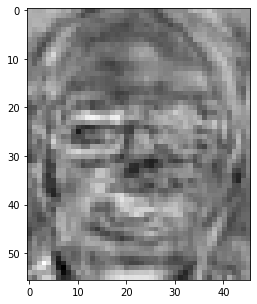

pca


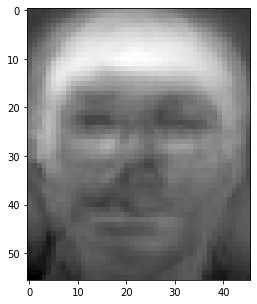

iteration= 1
lda


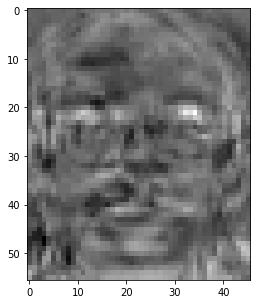

pca


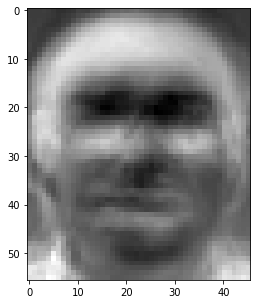

iteration= 2
lda


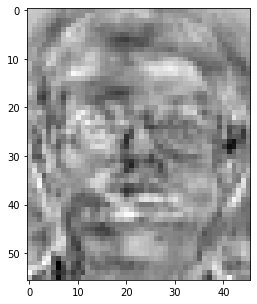

pca


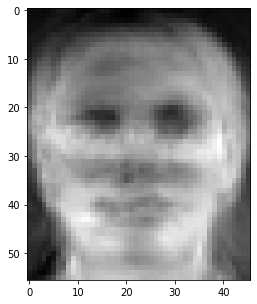

iteration= 3
lda


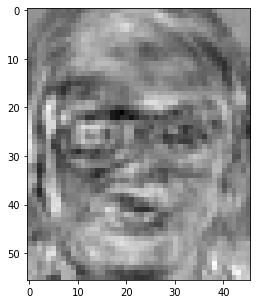

pca


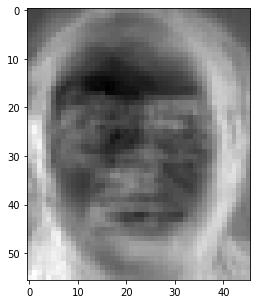

iteration= 4
lda


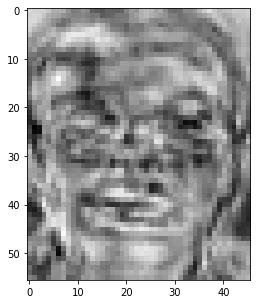

pca


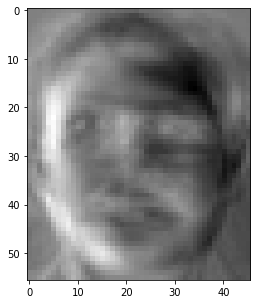

iteration= 5
lda


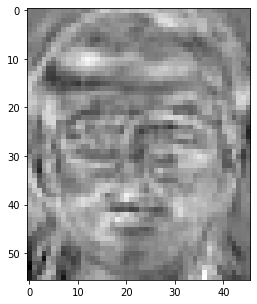

pca


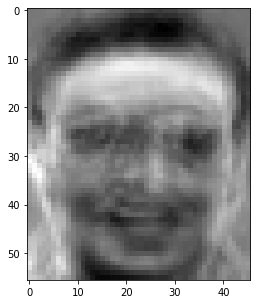

iteration= 6
lda


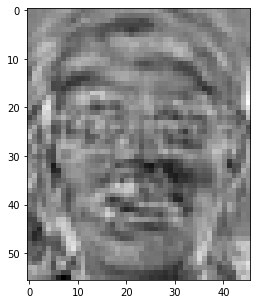

pca


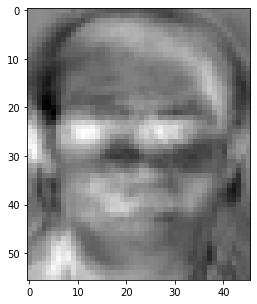

iteration= 7
lda


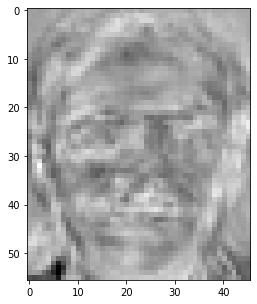

pca


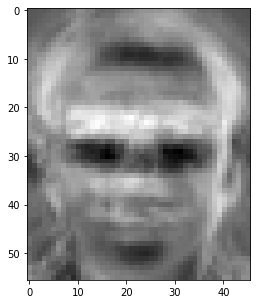

iteration= 8
lda


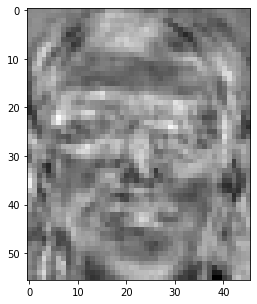

pca


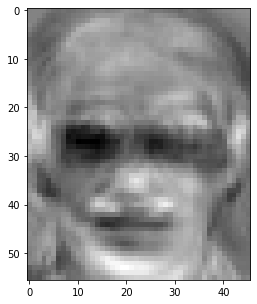

iteration= 9
lda


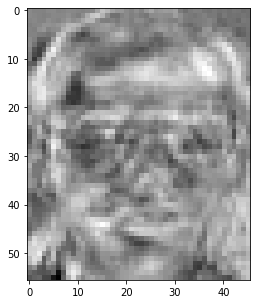

pca


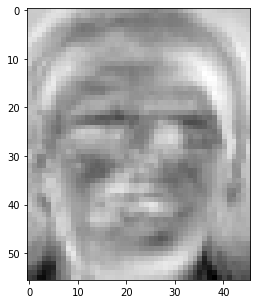

In [719]:
lda_prjback = np.matmul(eigenvector[:, :80], eigenvector_lda.real)
#image part of 39 eigenvalue would be zero
for i in range(10):
  print('iteration=', i)
  print('lda')
  show_image(lda_prjback[:, i])
  print('pca')
  show_image(eigenvector[:, i])

####24

In [720]:
lda_prjback.shape
T_80.reshape((80, 120))

array([[ 2.95088713e+00,  5.89924863e+00,  5.31185645e+00, ...,
         1.33677134e+00,  1.81728060e+00,  1.65859430e+00],
       [-2.40979293e+00, -2.03908485e+00, -1.31984747e+00, ...,
        -2.44233350e+00, -3.30413610e+00, -3.81475315e+00],
       [ 3.97983635e+00,  1.43536443e-01,  2.10885717e+00, ...,
        -3.22287501e+00, -1.56631921e+00, -1.88857614e+00],
       ...,
       [ 3.87781264e-01,  7.18841958e-02,  1.59881746e-02, ...,
        -3.23201505e-01,  1.89897833e-02,  1.88753600e-01],
       [ 1.41107603e-01, -2.84052641e-02, -2.75231948e-04, ...,
         7.20384232e-02, -2.90785000e-02, -1.70609508e-01],
       [ 6.13929191e-02,  8.56788268e-02,  1.70847783e-01, ...,
        -1.59214234e-01,  6.01148157e-02, -4.94748422e-01]])

In [721]:
fisher = (lda_prjback + eigenvector[:, :80])
# choose 39 feature for train
# fisher = fisher[:, :39]
fisher.shape

(2576, 80)

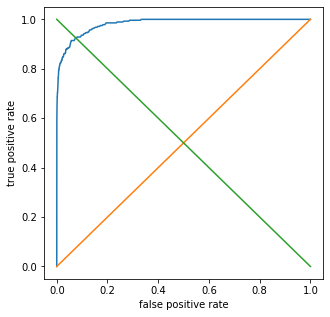

eer= 12.333333333333341
recall for fa 0.1% = 0.9357142857142857


In [722]:
p_fisher_t = np.matmul(fisher, T_80.reshape((80, 120)))
p_fisher_d = np.matmul(fisher, D_80.reshape((80, 280)))

sm_fisher = similarity_matrix(p_fisher_t, p_fisher_d)

eer_fisher, recall_fisher = eer_pipe(sm_fisher)
print('eer=', eer_fisher)
print('recall for fa 0.1% =', recall_fisher)

####25

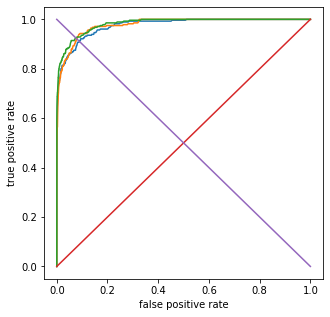

In [723]:
# no projection
plt.plot(fa_rate_list, tp_rate_list)

#PCA
min_t_pca, max_t_pca = find_threshold(sm_2)
tp_rate_list_pca, fa_rate_list_pca = roc(sm_2, min_t_pca, max_t_pca)
plt.plot(fa_rate_list_pca, tp_rate_list_pca)

#Fisher
min_t_fisher, max_t_fisher = find_threshold(sm_fisher)
tp_rate_list_fisher, fa_rate_list_fisher = roc(sm_fisher, min_t_fisher, max_t_fisher)
plt.plot(fa_rate_list_fisher, tp_rate_list_fisher)

plt.plot([0, 1], [0, 1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.plot([0, 1], [1, 0])
plt.show()

**Three experiment roc graph is very similar although having different number of features so we can say that the PCA and LDA projection performance are doing well.**